## 1. Importacion de librerías y carga de dataset

In [ ]:
#!pip install optuna -q

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import tensorflow as tf

import optuna

In [ ]:
url = './diabetes_dataset.csv'
df = pd.read_csv(url)

## 2. Analisis exploratorio

### 2.1. Descripción del dataset

In [ ]:
print("Primeras filas del DataFrame:")
df.head()

Primeras filas del DataFrame:


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
print("\nInformación del DataFrame:")
df.info()


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               25

In [ ]:
print("\nEstadísticas descriptivas:")
print(df.describe())


Estadísticas descriptivas:
        Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.00

In [ ]:
print("\nValores únicos por columna:")
print(df.nunique())


Valores únicos por columna:
Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64


### 2.2. Factores frecuentes de corrección

In [ ]:
print("Numero de valores nulos por columna: ")
print(df.isnull().sum())

Numero de valores nulos por columna: 
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


<Figure size 1500x1000 with 0 Axes>

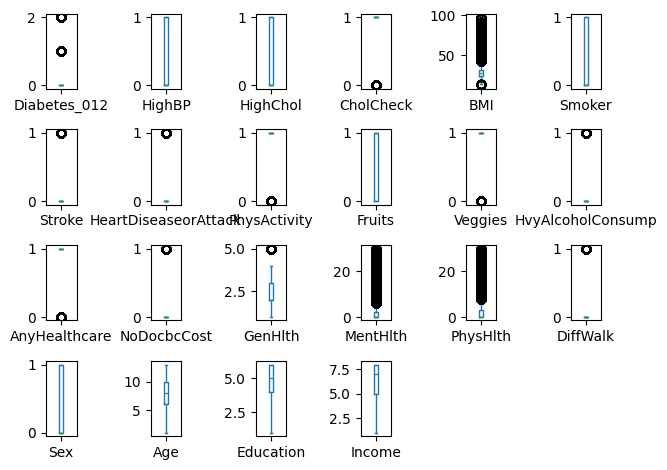

In [ ]:
# Visualización de distribución de datos numéricos mediante un grafico de cajas y velas para cada variable
# Ajuste del tamaño de cada figura
plt.figure(figsize=(15, 10))

# Creación de un grupo de graficos de cajas y velas
df.plot(kind='box', subplots=True, layout=(4, 6), sharex=False, sharey=False)

# Ajuste del formato de ejes para cada subgrafico
for ax in plt.gcf().axes:
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)

# Ajuste del diseño de los subplots
plt.tight_layout()

# Impresión del gráfico
plt.show()

In [ ]:
# Función para calcular el porcentaje de outliers para cada variable
def calcular_porcentaje_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1

    # Definición de límites para considerar un valor como outlier
    outliers = col[(col < Q1 - 1.5 * IQR) | (col > Q3 + 1.5 * IQR)]

    porcentaje = len(outliers) / len(col) * 100
    return porcentaje

# Ejecución de la función a todas las columnas y almacenar los resultados
porcentajes_outliers = {}
for columna in df.columns:
    porcentajes_outliers[columna] = calcular_porcentaje_outliers(df[columna])

# Impresión de los resultados
print("Porcentaje de outliers por columna: ")
for columna, porcentaje in porcentajes_outliers.items():
    print(f"La columna '{columna}' tiene un {porcentaje:.2f}% de outliers.")

Porcentaje de outliers por columna: 
La columna 'Diabetes_012' tiene un 15.76% de outliers.
La columna 'HighBP' tiene un 0.00% de outliers.
La columna 'HighChol' tiene un 0.00% de outliers.
La columna 'CholCheck' tiene un 3.73% de outliers.
La columna 'BMI' tiene un 3.88% de outliers.
La columna 'Smoker' tiene un 0.00% de outliers.
La columna 'Stroke' tiene un 4.06% de outliers.
La columna 'HeartDiseaseorAttack' tiene un 9.42% de outliers.
La columna 'PhysActivity' tiene un 24.35% de outliers.
La columna 'Fruits' tiene un 0.00% de outliers.
La columna 'Veggies' tiene un 18.86% de outliers.
La columna 'HvyAlcoholConsump' tiene un 5.62% de outliers.
La columna 'AnyHealthcare' tiene un 4.89% de outliers.
La columna 'NoDocbcCost' tiene un 8.42% de outliers.
La columna 'GenHlth' tiene un 4.76% de outliers.
La columna 'MentHlth' tiene un 14.27% de outliers.
La columna 'PhysHlth' tiene un 16.14% de outliers.
La columna 'DiffWalk' tiene un 16.82% de outliers.
La columna 'Sex' tiene un 0.00% de

### 2.3. Analisis de variable objetivo


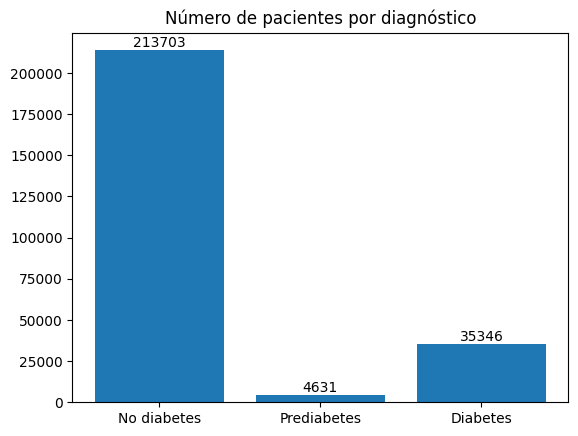

In [ ]:
#Imprimiendo el numero de instancias pertenecientes a cada clase de la variable objetivo en un grafico de barras
# Uso de value_counts() para contar los valores de cada clase
conteoclases = df["Diabetes_012"].value_counts()
# Creación de un diccionario para mapear los valores numéricos a los diagnósticos
mapping = {0: 'No diabetes', 1: 'Prediabetes', 2: 'Diabetes'}
#Uso de pltbar() para ingresar indices(etiquetas de clase) y valores(conteo) de conteoclases
plt.bar(conteoclases.index , conteoclases.values)
#Posicionamiento de las etiquetas ligeramente por encima de las barras y con un pequeño offset hacia la izquierda
for i in range(len(conteoclases.index)):
    plt.text(conteoclases.index[i], conteoclases.values[i] + 50, conteoclases.values[i], ha='center', va='bottom', fontsize=10)
#Personalización del gráfico
plt.title("Número de pacientes por diagnóstico")
plt.xticks(conteoclases.index)
# Cambio de las etiquetas del eje x por las letras correspondientes
plt.xticks(conteoclases.index, conteoclases.index.map(mapping))
plt.show()

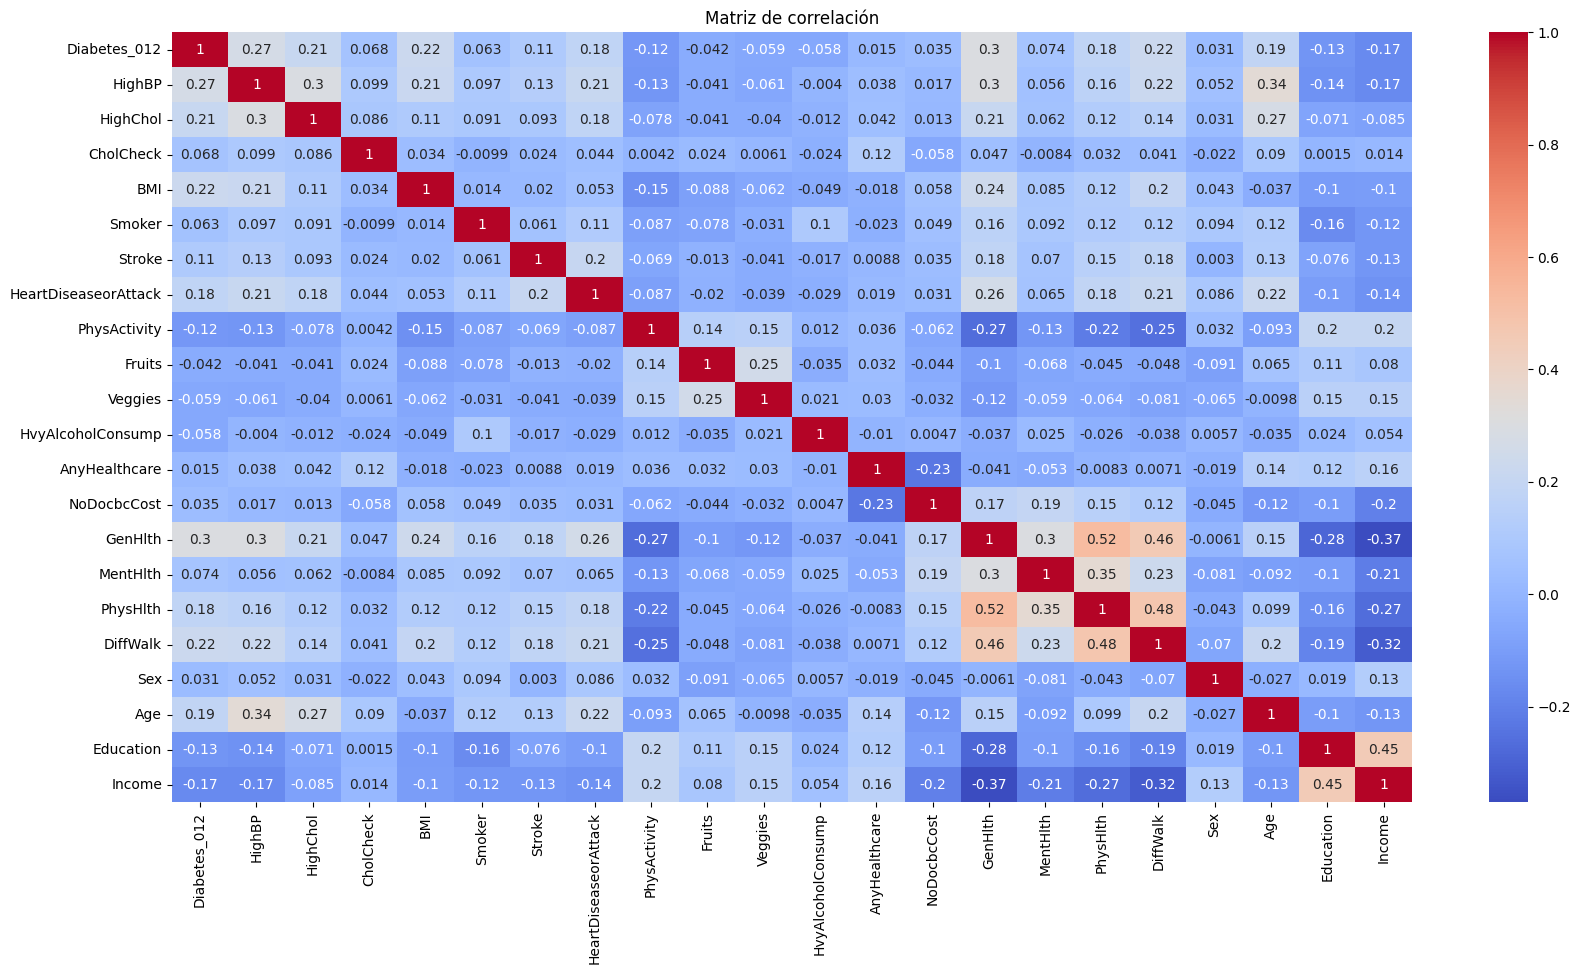

In [ ]:
#Matriz de correlación de variables
df = df.select_dtypes(include=[np.number])
correlation_matrix = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

## 3. Preprocesamiento de datos

In [ ]:
# Consolidación de la variable objetivo para trabajar con 2 clases: no diabetes (0) y prediabetes y diabetes (1)
df['Diabetes_012'] = df['Diabetes_012'].replace(2, 1)
print("\nDespués de reemplazar 2 con 1 en 'Diabetes_012':")
print(df['Diabetes_012'].value_counts())


Después de reemplazar 2 con 1 en 'Diabetes_012':
Diabetes_012
0.0    213703
1.0     39977
Name: count, dtype: int64


In [ ]:
# División de columnas en variables de entrada (X) y salida (Y)
X = df.drop(['Diabetes_012'],axis=1)
Y = df['Diabetes_012']
# Normalización de variables de entrada
Xesc = MinMaxScaler().fit_transform(X)

# Asignación de datos a grupos
x_tr, x_te, y_tr, y_te = train_test_split(Xesc, Y, test_size=0.2, random_state=42)

## 4. Primera Iteración: Selección de Algoritmos

## 4.1. Entrenamiento de modelos

In [ ]:
# Modelos Básicos

# Creación del modelo 1 - Naive Bayes Bernoulli
modeloNBB = BernoulliNB()
modeloNBB.fit(x_tr, y_tr)
y_pred_NBB = modeloNBB.predict(x_te)

# Creación el modelo 2 - Regresión Logística
modeloRL = LogisticRegression()
modeloRL.fit(x_tr, y_tr)
y_pred_RL = modeloRL.predict(x_te)

# Creación el modelo 3 - Maquinas de cectores de soporte
modeloSVC = SVC(kernel='linear')
modeloSVC.fit(x_tr, y_tr)
y_pred_SVC = modeloSVC.predict(x_te)

# Creación el modelo 4 - Arbol de decisión
modeloDTC = DecisionTreeClassifier()
modeloDTC.fit(x_tr, y_tr)
y_pred_DTC = modeloDTC.predict(x_te)

# Creación el modelo 5 - K vecinos cercanos
modeloKNN = KNeighborsClassifier(n_neighbors=5)
modeloKNN.fit(x_tr, y_tr)
y_pred_KNN = modeloKNN.predict(x_te)

In [ ]:
# Modelos de Ensemble Learning

# Creación el modelo 6 - Bosque Aleatorio
modeloRFC = RandomForestClassifier()
modeloRFC.fit(x_tr, y_tr)
y_pred_RFC = modeloRFC.predict(x_te)

# Creación el modelo 7 - XGBoost
modeloXGB = XGBClassifier()
modeloXGB.fit(x_tr, y_tr)
y_pred_XGB = modeloXGB.predict(x_te)

# Creación el modelo 8 - LightGBM
modeloLGB = LGBMClassifier()
modeloLGB.fit(x_tr, y_tr)
y_pred_LGB = modeloLGB.predict(x_te)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# Modelos de Redes Neuronales

# Creación el modelo 9 - Red Neuronal Multicapa
modeloRNM = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(x_tr.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

modeloRNM.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

history = modeloRNM.fit(x_tr, y_tr, epochs=30, batch_size=32, validation_split=0.2)

loss, accuracy = modeloRNM.evaluate(x_te, y_te)
y_pred_RNM = (modeloRNM.predict(x_te) > 0.5).astype("int32")

Epoch 1/30
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8426 - loss: 0.3656 - val_accuracy: 0.8495 - val_loss: 0.3446
Epoch 2/30
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8463 - loss: 0.3483 - val_accuracy: 0.8503 - val_loss: 0.3436
Epoch 3/30
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8486 - loss: 0.3452 - val_accuracy: 0.8500 - val_loss: 0.3420
Epoch 4/30
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8499 - loss: 0.3425 - val_accuracy: 0.8515 - val_loss: 0.3413
Epoch 5/30
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8488 - loss: 0.3456 - val_accuracy: 0.8503 - val_loss: 0.3407
Epoch 6/30
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.8500 - loss: 0.3410 - val_accuracy: 0.8492 - val_loss: 0.3423
Epoch 7/30
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.8510 - loss: 0.3397 - val_accuracy: 0.8514 - val_loss: 0.3399
Epoch 8/30
5074/5074 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.8494 - loss: 0


Loss: 0.33849650621414185
Accuracy: 0.8518211841583252


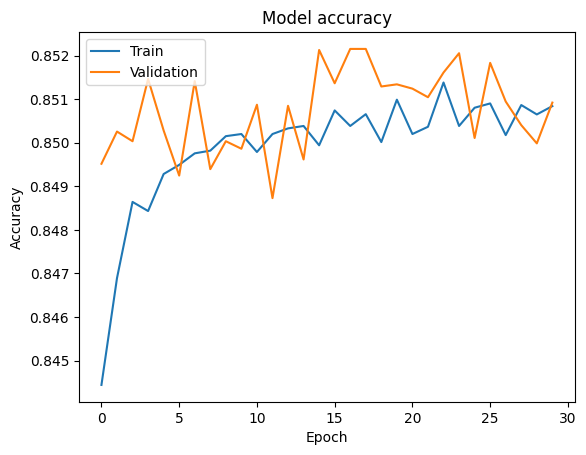

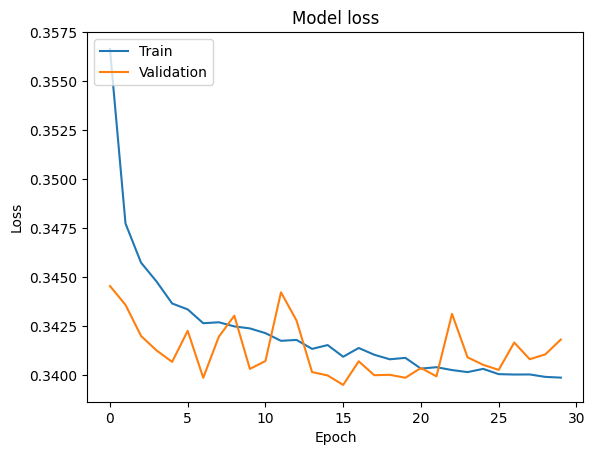

In [ ]:
print(f'\nLoss: {loss}')
print(f'Accuracy: {accuracy}')

# Grafica de accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Grafica de función de pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## 4.2. Evaluación de modelos

In [ ]:
#Código para mostrar la evaluación de los modelos

accuracy_NBB = accuracy_score(y_te, y_pred_NBB)
precision_NBB = precision_score(y_te, y_pred_NBB, average='weighted', zero_division=0)
recall_NBB = recall_score(y_te, y_pred_NBB, average='weighted')
f1_NBB =  2 * (precision_NBB * recall_NBB) / (precision_NBB + recall_NBB)

print(f" accuracy (Naive Bayes): {accuracy_NBB}")
print(f" precision (Naive Bayes): {precision_NBB}")
print(f" recall (Naive Bayes): {recall_NBB}")
print(f" f1-score (Naive Bayes): {f1_NBB}")

print()

accuracy_RL = accuracy_score(y_te, y_pred_RL)
precision_RL = precision_score(y_te, y_pred_RL, average='weighted', zero_division=0)
recall_RL = recall_score(y_te, y_pred_RL, average='weighted')
f1_RL =  2 * (precision_RL * recall_RL) / (precision_RL + recall_RL)

print(f" accuracy (Regresión Logística): {accuracy_RL}")
print(f" precision (Regresión Logística): {precision_RL}")
print(f" recall (Regresión Logística): {recall_RL}")
print(f" f1-score (Regresión Logística): {f1_RL}")

print()

accuracy_SVC = accuracy_score(y_te, y_pred_SVC)
precision_SVC = precision_score(y_te, y_pred_SVC, average='weighted', zero_division=0)
recall_SVC = recall_score(y_te, y_pred_SVC, average='weighted')
f1_SVC =  2 * (precision_SVC * recall_SVC) / (precision_SVC + recall_SVC)

print(f" accuracy (Support Vector Classifier): {accuracy_SVC}")
print(f" precision (Support Vector Classifier): {precision_SVC}")
print(f" recall (Support Vector Classifier): {recall_SVC}")
print(f" f1-score (Support Vector Classifier): {f1_SVC}")

print()

accuracy_DTC = accuracy_score(y_te, y_pred_DTC)
precision_DTC = precision_score(y_te, y_pred_DTC, average='weighted', zero_division=0)
recall_DTC = recall_score(y_te, y_pred_DTC, average='weighted')
f1_DTC =  2 * (precision_DTC * recall_DTC) / (precision_DTC + recall_DTC)

print(f" accuracy (Decision Tree Classifier): {accuracy_DTC}")
print(f" precision (Decision Tree Classifier): {precision_DTC}")
print(f" recall (Decision Tree Classifier): {recall_DTC}")
print(f" f1-score (Decision Tree Classifier): {f1_DTC}")

print()

accuracy_KNN = accuracy_score(y_te, y_pred_KNN)
precision_KNN = precision_score(y_te, y_pred_KNN, average='weighted', zero_division=0)
recall_KNN = recall_score(y_te, y_pred_KNN, average='weighted')
f1_KNN =  2 * (precision_KNN * recall_KNN) / (precision_KNN + recall_KNN)

print(f" accuracy (Decision Tree Classifier): {accuracy_KNN}")
print(f" precision (Decision Tree Classifier): {precision_KNN}")
print(f" recall (Decision Tree Classifier): {recall_KNN}")
print(f" f1-score (Decision Tree Classifier): {f1_KNN}")

print()

accuracy_RFC = accuracy_score(y_te, y_pred_RFC)
precision_RFC = precision_score(y_te, y_pred_RFC, average='weighted', zero_division=0)
recall_RFC = recall_score(y_te, y_pred_RFC, average='weighted')
f1_RFC =  2 * (precision_RFC * recall_RFC) / (precision_RFC + recall_RFC)

print(f" accuracy (Random Forest): {accuracy_RFC}")
print(f" precision (Random Forest): {precision_RFC}")
print(f" recall (Random Forest): {recall_RFC}")
print(f" f1-score (Random Forest): {f1_RFC}")

print()

accuracy_XGB = accuracy_score(y_te, y_pred_XGB)
precision_XGB = precision_score(y_te, y_pred_XGB, average='weighted', zero_division=0)
recall_XGB = recall_score(y_te, y_pred_XGB, average='weighted')
f1_XGB =  2 * (precision_XGB * recall_XGB) / (precision_XGB + recall_XGB)

print(f" accuracy (Random Forest): {accuracy_XGB}")
print(f" precision (Random Forest): {precision_XGB}")
print(f" recall (Random Forest): {recall_XGB}")
print(f" f1-score (Random Forest): {f1_XGB}")

print()

accuracy_LGB = accuracy_score(y_te, y_pred_LGB)
precision_LGB = precision_score(y_te, y_pred_LGB, average='weighted', zero_division=0)
recall_LGB = recall_score(y_te, y_pred_LGB, average='weighted')
f1_LGB =  2 * (precision_LGB * recall_LGB) / (precision_LGB + recall_LGB)

print(f" accuracy (Red Neuronal Multicapa): {accuracy_LGB}")
print(f" precision (Red Neuronal Multicapa): {precision_LGB}")
print(f" recall (Red Neuronal Multicapa): {recall_LGB}")
print(f" f1-score (Red Neuronal Multicapa): {f1_LGB}")

print()

accuracy_RNM = accuracy_score(y_te, y_pred_RNM)
precision_RNM = precision_score(y_te, y_pred_RNM, average='weighted', zero_division=0)
recall_RNM = recall_score(y_te, y_pred_RNM, average='weighted')
f1_RNM =  2 * (precision_RNM * recall_RNM) / (precision_RNM + recall_RNM)

print(f" accuracy (Red Neuronal Multicapa con Función de Activación): {accuracy_RNM}")
print(f" precision (Red Neuronal Multicapa con Función de Activación): {precision_RNM}")
print(f" recall (Red Neuronal Multicapa con Función de Activación): {recall_RNM}")
print(f" f1-score (Red Neuronal Multicapa con Función de Activación): {f1_RNM}")

 accuracy (Naive Bayes): 0.8127562283191422
 precision (Naive Bayes): 0.8089994803863526
 recall (Naive Bayes): 0.8127562283191422
 f1-score (Naive Bayes): 0.8108735031564005

 accuracy (Regresión Logística): 0.8493377483443708
 precision (Regresión Logística): 0.8172792271310071
 recall (Regresión Logística): 0.8493377483443708
 f1-score (Regresión Logística): 0.8330001539100875

 accuracy (Support Vector Classifier): 0.8434839167455062
 precision (Support Vector Classifier): 0.71146511780834
 recall (Support Vector Classifier): 0.8434839167455062
 f1-score (Support Vector Classifier): 0.7718701653382074

 accuracy (Decision Tree Classifier): 0.778106275622832
 precision (Decision Tree Classifier): 0.7872154944455609
 recall (Decision Tree Classifier): 0.778106275622832
 f1-score (Decision Tree Classifier): 0.7826343799829197

 accuracy (Decision Tree Classifier): 0.8268882056133712
 precision (Decision Tree Classifier): 0.7948973540492746
 recall (Decision Tree Classifier): 0.8268882

In [ ]:
# Construccion de tabla de resultados
resultadosPrimIt = {'Modelo': ['Bayes','Regresion Logistica', 'SVM', 'Decision Tree','KNN', 'Random Forest', 'XGBoost','LightGBM', 'RNM'],
        'Accuracy': [accuracy_NBB, accuracy_RL, accuracy_SVC, accuracy_DTC, accuracy_KNN, accuracy_RFC, accuracy_XGB, accuracy_LGB, accuracy_RNM],
        'Precision': [precision_NBB, precision_RL, precision_SVC, precision_DTC, precision_KNN, precision_RFC, precision_XGB, precision_LGB, precision_RNM],
        'Recall': [recall_NBB, recall_RL, recall_SVC, recall_DTC, recall_KNN, recall_RFC, recall_XGB, recall_LGB, recall_RNM],
        'F1-Score': [f1_NBB, f1_RL, f1_SVC, f1_DTC, f1_KNN, f1_RFC, f1_XGB, f1_LGB, f1_RNM]}

df_res1 = pd.DataFrame(resultadosPrimIt)
df_res1.head(10)

,Modelo,Accuracy,Precision,Recall,F1-Score
0,Bayes,0.812756,0.808999,0.812756,0.810874
1,Regresion Logistica,0.849338,0.817279,0.849338,0.833000
2,SVM,0.843484,0.711465,0.843484,0.771870
3,Decision Tree,0.778106,0.787215,0.778106,0.782634
4,KNN,0.826888,0.794897,0.826888,0.810577
5,Random Forest,0.843326,0.810238,0.843326,0.826451
6,XGBoost,0.851230,0.821708,0.851230,0.836209
7,LightGBM,0.852491,0.823509,0.852491,0.837750
8,RNM,0.851821,0.821773,0.851821,0.836528


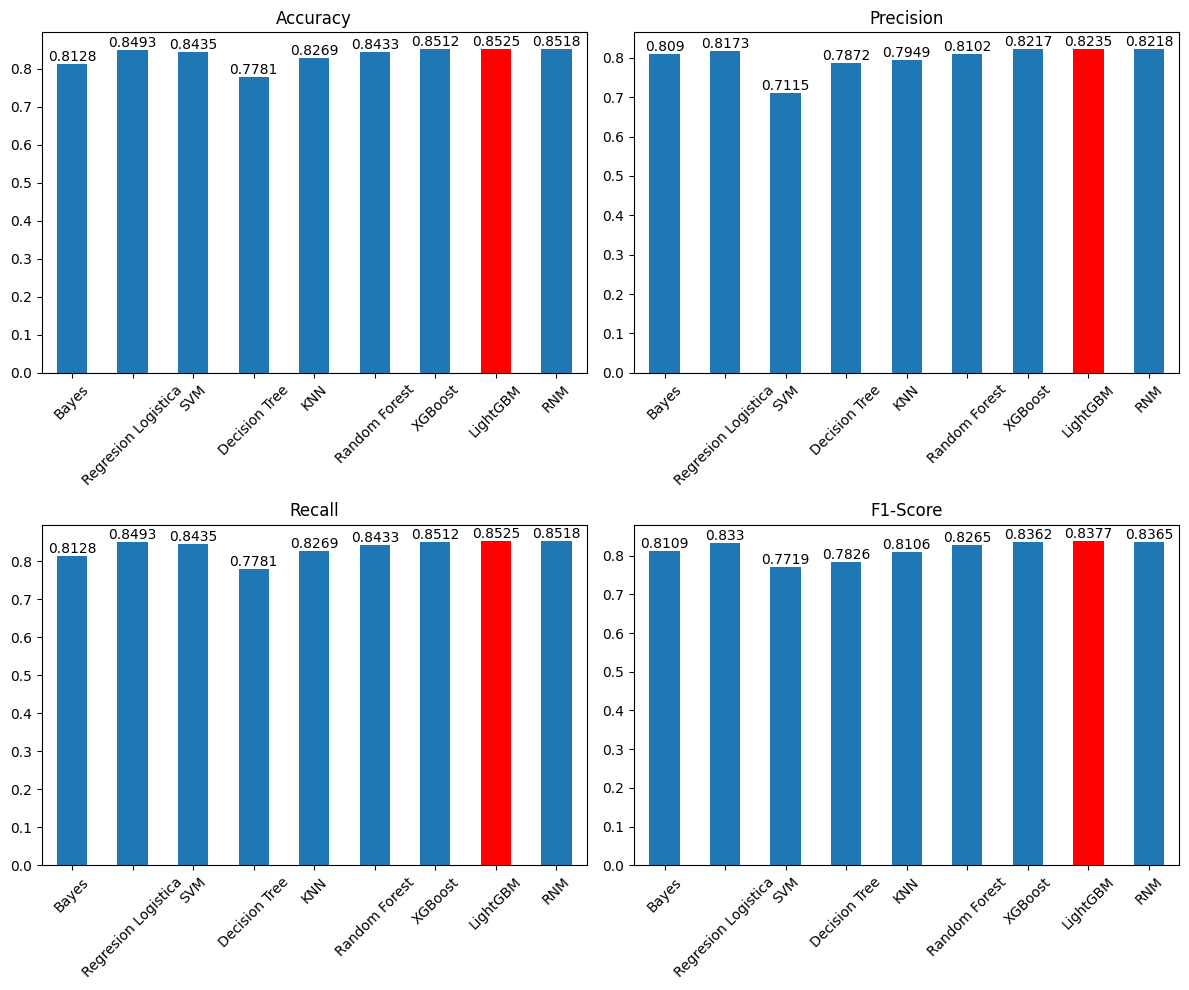

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

metrics = {'Accuracy': axes[0, 0],
           'Precision': axes[0, 1],
           'Recall': axes[1, 0],
           'F1-Score': axes[1, 1]}

for metric, ax in metrics.items():
    df_res1.plot(x='Modelo', y=metric, kind='bar', ax=ax, title=metric, legend=False)
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)

    max_value = df_res1[metric].max()

    for p in ax.patches:
        height = round(p.get_height(), 4)
        ax.annotate(str(height), (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)
        if height == round(max_value, 4):
            p.set_facecolor('red') # Pinta de rojo la barra del valor máximo

plt.tight_layout()
plt.show()

# 5. Segunda Iteración: Optimización automatizada de modelos

## 5.1. Entrenamiento de modelos

In [ ]:
def objective_RL(trial):
    """La función objetivo a optimizar para Optuna será F1-Score."""

    # Definición de hiperparámetros a optimizar
    penalty_RL = trial.suggest_categorical("penalty", ["l1", "l2", "elasticnet", "none"])
    C_RL = trial.suggest_float("C", 1e-4, 1e4, log=True)
    l1_ratio_RL = None
    if penalty_RL == "elasticnet":
        l1_ratio_RL = trial.suggest_float("l1_ratio", 0, 1)

    # Definición de algoritmo solver
    all_solvers_RL = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
    solver_RL = trial.suggest_categorical("solver", all_solvers_RL)

    # Revisión de compatibilidad entre solver e hiperparámetro penalty
    if penalty_RL == "l1" and solver_RL not in ["liblinear", "saga"]:
        raise optuna.exceptions.TrialPruned()
    elif penalty_RL == "elasticnet" and solver_RL != "saga":
        raise optuna.exceptions.TrialPruned()
    elif penalty_RL == "none" and solver_RL not in ["newton-cg", "lbfgs", "sag", "saga"]:
        raise optuna.exceptions.TrialPruned()
    elif penalty_RL == "l2" and solver_RL not in ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]:
        raise optuna.exceptions.TrialPruned()

    # Manejo del caso "none"
    final_penalty_RL = penalty_RL if penalty_RL != "none" else None

    # Creación y entrenamiento del modelo de regresión logística
    model_params_RL = {'C': C_RL, 'solver': solver_RL, 'random_state': 42, 'max_iter': 1000}
    if final_penalty_RL is not None:
        model_params_RL['penalty'] = final_penalty_RL
    if l1_ratio_RL is not None:
        model_params_RL['l1_ratio'] = l1_ratio_RL

    model_RL = LogisticRegression(**model_params_RL)

    try:
        model_RL.fit(x_tr, y_tr)
    except ValueError as e:
        if "LogisticRegression supports only" in str(e) or "Specify `l1_ratio`" in str(e):
            raise optuna.exceptions.TrialPruned()
        else:
            raise e

    # Evaluación del modelo usando F1-score
    y_pred_RL = model_RL.predict(x_te)
    f1_RL = f1_score(y_te, y_pred_RL, average='weighted', zero_division=0)
    return f1_RL

# Creación del objeto de estudio y optimización de la función objetivo (F1-Score) para RL
study_RL = optuna.create_study(direction="maximize", study_name="LogisticRegressionOptimization")
study_RL.optimize(objective_RL, n_trials=20)

# Impresión de los mejores hiperparámetros para RL
print("\nMejores hiperparámetros (Regresión Logística): ", study_RL.best_params)

# Entrenamiento del modelo final de RL con los mejores hiperparámetros
best_params_RL = study_RL.best_params
final_penalty_RL = best_params_RL.get('penalty')
final_l1_ratio_RL = best_params_RL.get('l1_ratio')

final_model_params_RL = {'C': best_params_RL['C'], 'solver': best_params_RL['solver'], 'random_state': 42, 'max_iter': 1000}
if final_penalty_RL is not None and final_penalty_RL != 'none':
    final_model_params_RL['penalty'] = final_penalty_RL
elif final_penalty_RL == 'elasticnet':
    final_model_params_RL['l1_ratio'] = final_l1_ratio_RL

best_model_RL = LogisticRegression(**final_model_params_RL)

try:
    best_model_RL.fit(x_tr, y_tr)
    # Evaluación del mejor modelo de RL
    y_pred_RL_tuned = best_model_RL.predict(x_te)

    accuracy_RL_tuned = accuracy_score(y_te, y_pred_RL_tuned)
    precision_RL_tuned = precision_score(y_te, y_pred_RL_tuned, average='weighted', zero_division=0)
    recall_RL_tuned = recall_score(y_te, y_pred_RL_tuned, average='weighted')
    f1_RL_tuned = f1_score(y_te, y_pred_RL_tuned, average='weighted', zero_division=0)

    print("\nMétricas Optimizadas de Regresión Logística (basado en F1-score):")
    print(f" accuracy: {accuracy_RL_tuned}")
    print(f" precision: {precision_RL_tuned}")
    print(f" recall: {recall_RL_tuned}")
    print(f" f1-score: {f1_RL_tuned}")

except ValueError as e:
    print(f"No se pudo entrenar el modelo final (Regresión Logística) con los mejores parámetros debido a: {e}")
    print(f"Mejores parámetros encontrados (Regresión Logística): {best_params_RL}")

[I 2025-05-27 22:20:01,477] A new study created in memory with name: LogisticRegressionOptimization
[I 2025-05-27 22:20:04,225] Trial 0 finished with value: 0.8155806103832981 and parameters: {'penalty': 'l2', 'C': 0.04989791892789623, 'solver': 'sag'}. Best is trial 0 with value: 0.8155806103832981.
[I 2025-05-27 22:20:07,717] Trial 1 finished with value: 0.8056515868113054 and parameters: {'penalty': 'none', 'C': 0.0031802600965016707, 'solver': 'saga'}. Best is trial 0 with value: 0.8155806103832981.
[I 2025-05-27 22:20:07,721] Trial 2 pruned. 
[I 2025-05-27 22:20:11,100] Trial 3 finished with value: 0.8168540890123813 and parameters: {'penalty': 'l2', 'C': 9476.624176458188, 'solver': 'saga'}. Best is trial 3 with value: 0.8168540890123813.
[I 2025-05-27 22:20:11,104] Trial 4 pruned. 
[I 2025-05-27 22:20:12,357] Trial 5 finished with value: 0.8000166201891282 and parameters: {'penalty': 'l2', 'C': 0.0012430245487844531, 'solver': 'newton-cg'}. Best is trial 3 with value: 0.81685408


Mejores hiperparámetros (Regresión Logística):  {'penalty': 'l2', 'C': 9476.624176458188, 'solver': 'saga'}

Métricas Optimizadas de Regresión Logística (basado en F1-score):
 accuracy: 0.8493771680857773
 precision: 0.817374004894367
 recall: 0.8493771680857773
 f1-score: 0.8168540890123813


In [ ]:
def objective_XGB(trial):
    """La función objetivo a optimizar para Optuna será F1-Score usando XGBoost."""

    # Definición de hiperparámetros a optimizar para XGBoost
    n_estimators_XGB = trial.suggest_int("n_estimators", 100, 1000, step=100)
    learning_rate_XGB = trial.suggest_float("learning_rate", 0.001, 0.1, log=True)
    max_depth_XGB = trial.suggest_int("max_depth", 3, 10)
    min_child_weight_XGB = trial.suggest_int("min_child_weight", 1, 10)
    subsample_XGB = trial.suggest_float("subsample", 0.5, 1.0)
    colsample_bytree_XGB = trial.suggest_float("colsample_bytree", 0.5, 1.0)

    # Creación y entrenamiento del modelo XGBoost
    model_XGB = XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        n_estimators=n_estimators_XGB,
        learning_rate=learning_rate_XGB,
        max_depth=max_depth_XGB,
        min_child_weight=min_child_weight_XGB,
        subsample=subsample_XGB,
        colsample_bytree=colsample_bytree_XGB,
        random_state=42,
        n_jobs=-1 # Usar todos los núcleos
    )

    model_XGB.fit(x_tr, y_tr)

    # Evaluación del modelo usando F1-score (ponderado por el desbalance)
    y_pred_XGB = model_XGB.predict(x_te)
    f1_XGB = f1_score(y_te, y_pred_XGB, average='weighted', zero_division=0)
    return f1_XGB

# Creación del objeto de estudio y optimización de la función objetivo (F1-Score) para XGB
study_XGB = optuna.create_study(direction="maximize", study_name="XGBoostOptimization")
study_XGB.optimize(objective_XGB, n_trials=20)

# Impresión de los mejores hiperparámetros para XGB
print("\nMejores hiperparámetros (XGBoost): ", study_XGB.best_params)

# Entrenamiento del modelo final de XGBoost con los mejores hiperparámetros
best_params_XGB = study_XGB.best_params
best_model_XGB = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1,
    **best_params_XGB
)

best_model_XGB.fit(x_tr, y_tr)

# Evaluación del mejor modelo de XGBoost
y_pred_XGB_tuned = best_model_XGB.predict(x_te)
f1_XGB_tuned = f1_score(y_te, y_pred_XGB_tuned, average='weighted', zero_division=0)
accuracy_XGB_tuned = accuracy_score(y_te, y_pred_XGB_tuned)
precision_XGB_tuned = precision_score(y_te, y_pred_XGB_tuned, average='weighted', zero_division=0)
recall_XGB_tuned = recall_score(y_te, y_pred_XGB_tuned, average='weighted')

print("\nMétricas Optimizadas de XGBoost (basado en F1-score):")
print(f" F1-score: {f1_XGB_tuned}")
print(f" Accuracy: {accuracy_XGB_tuned}")
print(f" Precision: {precision_XGB_tuned}")
print(f" Recall: {recall_XGB_tuned}")

[I 2025-05-27 22:22:20,274] A new study created in memory with name: XGBoostOptimization
[I 2025-05-27 22:22:38,747] Trial 0 finished with value: 0.821822895661056 and parameters: {'n_estimators': 900, 'learning_rate': 0.034933957450796624, 'max_depth': 5, 'min_child_weight': 2, 'subsample': 0.9546695019727458, 'colsample_bytree': 0.563297147801113}. Best is trial 0 with value: 0.821822895661056.
[I 2025-05-27 22:22:53,789] Trial 1 finished with value: 0.8207469944186349 and parameters: {'n_estimators': 800, 'learning_rate': 0.012721515035733669, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.5534787652044205, 'colsample_bytree': 0.5979242926472232}. Best is trial 0 with value: 0.821822895661056.
[I 2025-05-27 22:23:13,424] Trial 2 finished with value: 0.799850638277693 and parameters: {'n_estimators': 800, 'learning_rate': 0.0026284822370454485, 'max_depth': 5, 'min_child_weight': 9, 'subsample': 0.8094061743131047, 'colsample_bytree': 0.7586833857206431}. Best is trial 0 with 


Mejores hiperparámetros (XGBoost):  {'n_estimators': 700, 'learning_rate': 0.025769044847679702, 'max_depth': 6, 'min_child_weight': 2, 'subsample': 0.836133156694234, 'colsample_bytree': 0.9371898137220076}

Métricas Optimizadas de XGBoost (basado en F1-score):
 F1-score: 0.8222996874842804
 Accuracy: 0.853082623777988
 Precision: 0.824580549021333
 Recall: 0.853082623777988


In [ ]:
def objective_LGB(trial):
    """La función objetivo a optimizar para Optuna será F1-Score usando LightGBM."""

    # Definición de hiperparámetros a optimizar para LightGBM
    n_estimators_LGB = trial.suggest_int("n_estimators", 100, 1000, step=100)
    learning_rate_LGB = trial.suggest_float("learning_rate", 0.001, 0.1, log=True)
    num_leaves_LGB = trial.suggest_int("num_leaves", 31, 150)
    min_child_samples_LGB = trial.suggest_int("min_child_samples", 20, 100)
    subsample_LGB = trial.suggest_float("subsample", 0.7, 1.0)
    colsample_bytree_LGB = trial.suggest_float("colsample_bytree", 0.7, 1.0)

    # Creación y entrenamiento del modelo LightGBM
    model_LGB = LGBMClassifier(
        objective='binary',
        metric='binary_logloss',
        n_estimators=n_estimators_LGB,
        learning_rate=learning_rate_LGB,
        num_leaves=num_leaves_LGB,
        min_child_samples=min_child_samples_LGB,
        subsample=subsample_LGB,
        colsample_bytree=colsample_bytree_LGB,
        random_state=42,
        n_jobs=-1
    )

    model_LGB.fit(x_tr, y_tr)

    # Evaluación del modelo usando F1-score (ponderado por el desbalance)
    y_pred_LGB = model_LGB.predict(x_te)
    f1_LGB = f1_score(y_te, y_pred_LGB, average='weighted', zero_division=0)
    return f1_LGB

# Creación del objeto de estudio y optimización de la función objetivo (F1-Score) para LGB
study_LGB = optuna.create_study(direction="maximize", study_name="LightGBMOptimization")
study_LGB.optimize(objective_LGB, n_trials=20)

# Impresión de los mejores hiperparámetros para LGB
print("\nMejores hiperparámetros (LightGBM): ", study_LGB.best_params)

# Entrenamiento del modelo final de LightGBM con los mejores hiperparámetros
best_params_LGB = study_LGB.best_params
best_model_LGB = LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    random_state=42,
    n_jobs=-1,
    **best_params_LGB
)

best_model_LGB.fit(x_tr, y_tr)

# Evaluación del mejor modelo de LightGBM
y_pred_LGB_tuned = best_model_LGB.predict(x_te)
f1_LGB_tuned = f1_score(y_te, y_pred_LGB_tuned, average='weighted', zero_division=0)
accuracy_LGB_tuned = accuracy_score(y_te, y_pred_LGB_tuned)
precision_LGB_tuned = precision_score(y_te, y_pred_LGB_tuned, average='weighted', zero_division=0)
recall_LGB_tuned = recall_score(y_te, y_pred_LGB_tuned, average='weighted')

print("\nMétricas Optimizadas de LightGBM (basado en F1-score):")
print(f" F1-score: {f1_LGB_tuned}")
print(f" Accuracy: {accuracy_LGB_tuned}")
print(f" Precision: {precision_LGB_tuned}")
print(f" Recall: {recall_LGB_tuned}")

[I 2025-05-27 22:37:22,341] A new study created in memory with name: LightGBMOptimization
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:37:46,691] Trial 0 finished with value: 0.8217268754121436 and parameters: {'n_estimators': 800, 'learning_rate': 0.024971926550402247, 'num_leaves': 83, 'min_child_samples': 32, 'subsample': 0.9932822048505126, 'colsample_bytree': 0.7785824493847834}. Best is trial 0 with value: 0.8217268754121436.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:37:59,897] Trial 1 finished with value: 0.7830726429335596 and parameters: {'n_estimators': 300, 'learning_rate': 0.004023563804621661, 'num_leaves': 92, 'min_child_samples': 47, 'subsample': 0.9069348031758584, 'colsample_bytree': 0.9305439463134277}. Best is trial 0 with value: 0.8217268754121436.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:38:09,096] Trial 2 finished with value: 0.8218123238012418 and parameters: {'n_estimators': 200, 'learning_rate': 0.03367963705112798, 'num_leaves': 150, 'min_child_samples': 87, 'subsample': 0.7990707333884464, 'colsample_bytree': 0.9543391686040795}. Best is trial 2 with value: 0.8218123238012418.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:38:50,604] Trial 3 finished with value: 0.80057409599471 and parameters: {'n_estimators': 1000, 'learning_rate': 0.0019356727635229383, 'num_leaves': 64, 'min_child_samples': 29, 'subsample': 0.7794804611135971, 'colsample_bytree': 0.7502748422055786}. Best is trial 2 with value: 0.8218123238012418.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:39:04,911] Trial 4 finished with value: 0.7812922570961341 and parameters: {'n_estimators': 300, 'learning_rate': 0.003911936484188441, 'num_leaves': 149, 'min_child_samples': 95, 'subsample': 0.8180953712022464, 'colsample_bytree': 0.8555775976620285}. Best is trial 2 with value: 0.8218123238012418.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.059496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:39:27,775] Trial 5 finished with value: 0.8109584646264134 and parameters: {'n_estimators': 400, 'learning_rate': 0.006338644869055508, 'num_leaves': 135, 'min_child_samples': 67, 'subsample': 0.7269290613872176, 'colsample_bytree': 0.758422761762954}. Best is trial 2 with value: 0.8218123238012418.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:39:38,585] Trial 6 finished with value: 0.7719178327641386 and parameters: {'n_estimators': 300, 'learning_rate': 0.0035358874838617273, 'num_leaves': 34, 'min_child_samples': 41, 'subsample': 0.9563074316838088, 'colsample_bytree': 0.7323403165851936}. Best is trial 2 with value: 0.8218123238012418.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:39:45,474] Trial 7 finished with value: 0.8136999325245761 and parameters: {'n_estimators': 200, 'learning_rate': 0.014803080588408847, 'num_leaves': 74, 'min_child_samples': 48, 'subsample': 0.9774142497108027, 'colsample_bytree': 0.7690337012029825}. Best is trial 2 with value: 0.8218123238012418.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.165988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:39:54,032] Trial 8 finished with value: 0.7906458255988454 and parameters: {'n_estimators': 200, 'learning_rate': 0.0072755370629911, 'num_leaves': 84, 'min_child_samples': 56, 'subsample': 0.9252678214472358, 'colsample_bytree': 0.9201226346693462}. Best is trial 2 with value: 0.8218123238012418.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:40:29,756] Trial 9 finished with value: 0.7731019483284871 and parameters: {'n_estimators': 1000, 'learning_rate': 0.001093865606506965, 'num_leaves': 44, 'min_child_samples': 44, 'subsample': 0.8736597040698431, 'colsample_bytree': 0.8799073585902635}. Best is trial 2 with value: 0.8218123238012418.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:40:47,033] Trial 10 finished with value: 0.8202958277748875 and parameters: {'n_estimators': 600, 'learning_rate': 0.07808217540687304, 'num_leaves': 115, 'min_child_samples': 99, 'subsample': 0.7046939537794746, 'colsample_bytree': 0.9952793905758132}. Best is trial 2 with value: 0.8218123238012418.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030355 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:41:12,335] Trial 11 finished with value: 0.8209634168476354 and parameters: {'n_estimators': 800, 'learning_rate': 0.029563271503699546, 'num_leaves': 108, 'min_child_samples': 74, 'subsample': 0.8106632405210724, 'colsample_bytree': 0.8070040216857083}. Best is trial 2 with value: 0.8218123238012418.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:41:39,859] Trial 12 finished with value: 0.8215480704828259 and parameters: {'n_estimators': 800, 'learning_rate': 0.035201588770961585, 'num_leaves': 109, 'min_child_samples': 85, 'subsample': 0.9993236757428257, 'colsample_bytree': 0.7015783924238274}. Best is trial 2 with value: 0.8218123238012418.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:41:58,323] Trial 13 finished with value: 0.8217855598616332 and parameters: {'n_estimators': 600, 'learning_rate': 0.020030743971067508, 'num_leaves': 59, 'min_child_samples': 23, 'subsample': 0.7612088256313165, 'colsample_bytree': 0.8203623533318442}. Best is trial 2 with value: 0.8218123238012418.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:42:12,707] Trial 14 finished with value: 0.8214251117467126 and parameters: {'n_estimators': 600, 'learning_rate': 0.05502717809678305, 'num_leaves': 58, 'min_child_samples': 79, 'subsample': 0.7560350202422691, 'colsample_bytree': 0.9806978724804872}. Best is trial 2 with value: 0.8218123238012418.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:42:16,722] Trial 15 finished with value: 0.7875911337873298 and parameters: {'n_estimators': 100, 'learning_rate': 0.01389567663517697, 'num_leaves': 129, 'min_child_samples': 23, 'subsample': 0.8354165458618521, 'colsample_bytree': 0.8204829910789401}. Best is trial 2 with value: 0.8218123238012418.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:42:28,119] Trial 16 finished with value: 0.8221115634579916 and parameters: {'n_estimators': 500, 'learning_rate': 0.09945059920748855, 'num_leaves': 58, 'min_child_samples': 58, 'subsample': 0.7744731651176794, 'colsample_bytree': 0.9015298832873255}. Best is trial 16 with value: 0.8221115634579916.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:42:40,980] Trial 17 finished with value: 0.8213225656776129 and parameters: {'n_estimators': 500, 'learning_rate': 0.09959200511162358, 'num_leaves': 97, 'min_child_samples': 62, 'subsample': 0.8673189385737947, 'colsample_bytree': 0.9293661406967745}. Best is trial 16 with value: 0.8221115634579916.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:42:44,181] Trial 18 finished with value: 0.8207478596818277 and parameters: {'n_estimators': 100, 'learning_rate': 0.05419162830758133, 'num_leaves': 42, 'min_child_samples': 88, 'subsample': 0.7806999775841474, 'colsample_bytree': 0.9617677165866597}. Best is trial 16 with value: 0.8221115634579916.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:43:00,905] Trial 19 finished with value: 0.8209015484356385 and parameters: {'n_estimators': 500, 'learning_rate': 0.04798879993149102, 'num_leaves': 141, 'min_child_samples': 73, 'subsample': 0.7999605656665075, 'colsample_bytree': 0.8849723691384874}. Best is trial 16 with value: 0.8221115634579916.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:43:10,888] Trial 20 finished with value: 0.8212741457820394 and parameters: {'n_estimators': 400, 'learning_rate': 0.09775459195270479, 'num_leaves': 124, 'min_child_samples': 55, 'subsample': 0.7323206237232972, 'colsample_bytree': 0.9554466480178785}. Best is trial 16 with value: 0.8221115634579916.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:43:32,637] Trial 21 finished with value: 0.8217084031111617 and parameters: {'n_estimators': 700, 'learning_rate': 0.019268569490711138, 'num_leaves': 65, 'min_child_samples': 36, 'subsample': 0.7634979378826097, 'colsample_bytree': 0.9000512892892993}. Best is trial 16 with value: 0.8221115634579916.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:43:48,575] Trial 22 finished with value: 0.8225422041093045 and parameters: {'n_estimators': 700, 'learning_rate': 0.03840058610829022, 'num_leaves': 52, 'min_child_samples': 21, 'subsample': 0.7449943870010213, 'colsample_bytree': 0.8467713320715254}. Best is trial 22 with value: 0.8225422041093045.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060514 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:44:09,211] Trial 23 finished with value: 0.8215058022662166 and parameters: {'n_estimators': 700, 'learning_rate': 0.046437046664116605, 'num_leaves': 50, 'min_child_samples': 64, 'subsample': 0.7176919527388792, 'colsample_bytree': 0.8575998687995774}. Best is trial 22 with value: 0.8225422041093045.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:44:34,467] Trial 24 finished with value: 0.8214444869888257 and parameters: {'n_estimators': 900, 'learning_rate': 0.06887609798069845, 'num_leaves': 73, 'min_child_samples': 89, 'subsample': 0.8413264689686172, 'colsample_bytree': 0.9045766597526874}. Best is trial 22 with value: 0.8225422041093045.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:44:43,938] Trial 25 finished with value: 0.8229009676139765 and parameters: {'n_estimators': 400, 'learning_rate': 0.035661693503459345, 'num_leaves': 34, 'min_child_samples': 52, 'subsample': 0.7899457435642404, 'colsample_bytree': 0.9532437745624431}. Best is trial 25 with value: 0.8229009676139765.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:44:56,581] Trial 26 finished with value: 0.8190197641814694 and parameters: {'n_estimators': 400, 'learning_rate': 0.012020893636684528, 'num_leaves': 39, 'min_child_samples': 57, 'subsample': 0.7439428212493662, 'colsample_bytree': 0.8437161147820083}. Best is trial 25 with value: 0.8229009676139765.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.111222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:45:07,261] Trial 27 finished with value: 0.8227373184204849 and parameters: {'n_estimators': 500, 'learning_rate': 0.06808015977482726, 'num_leaves': 50, 'min_child_samples': 52, 'subsample': 0.7830294645611255, 'colsample_bytree': 0.86632446741884}. Best is trial 25 with value: 0.8229009676139765.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:45:24,839] Trial 28 finished with value: 0.8223205838088579 and parameters: {'n_estimators': 700, 'learning_rate': 0.03662040595101284, 'num_leaves': 34, 'min_child_samples': 51, 'subsample': 0.8231975969238841, 'colsample_bytree': 0.7952081075871341}. Best is trial 25 with value: 0.8229009676139765.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:45:42,656] Trial 29 finished with value: 0.8218020217050793 and parameters: {'n_estimators': 700, 'learning_rate': 0.022005157308851896, 'num_leaves': 48, 'min_child_samples': 36, 'subsample': 0.7417681894802348, 'colsample_bytree': 0.8383347530547832}. Best is trial 25 with value: 0.8229009676139765.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:46:00,912] Trial 30 finished with value: 0.8225459818807562 and parameters: {'n_estimators': 900, 'learning_rate': 0.06699770376265649, 'num_leaves': 32, 'min_child_samples': 29, 'subsample': 0.7914552109326097, 'colsample_bytree': 0.8648621667575527}. Best is trial 25 with value: 0.8229009676139765.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.241517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:46:20,716] Trial 31 finished with value: 0.8217548551158768 and parameters: {'n_estimators': 900, 'learning_rate': 0.061211666007780115, 'num_leaves': 32, 'min_child_samples': 20, 'subsample': 0.7923968933999198, 'colsample_bytree': 0.8835961461061951}. Best is trial 25 with value: 0.8229009676139765.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:46:43,128] Trial 32 finished with value: 0.8219510368155134 and parameters: {'n_estimators': 900, 'learning_rate': 0.02631173265994418, 'num_leaves': 50, 'min_child_samples': 28, 'subsample': 0.866226972217752, 'colsample_bytree': 0.7905753757053943}. Best is trial 25 with value: 0.8229009676139765.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:46:51,625] Trial 33 finished with value: 0.8222665405048765 and parameters: {'n_estimators': 400, 'learning_rate': 0.03990689463836857, 'num_leaves': 31, 'min_child_samples': 38, 'subsample': 0.7026805698281542, 'colsample_bytree': 0.8714167628928916}. Best is trial 25 with value: 0.8229009676139765.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:47:09,539] Trial 34 finished with value: 0.8210670383965291 and parameters: {'n_estimators': 800, 'learning_rate': 0.07561541379883273, 'num_leaves': 41, 'min_child_samples': 30, 'subsample': 0.7940594570040176, 'colsample_bytree': 0.8329864386321508}. Best is trial 25 with value: 0.8229009676139765.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.234554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:47:22,269] Trial 35 finished with value: 0.8225528286227405 and parameters: {'n_estimators': 500, 'learning_rate': 0.044045657028431676, 'num_leaves': 50, 'min_child_samples': 48, 'subsample': 0.7485702776644244, 'colsample_bytree': 0.8634107055852628}. Best is trial 25 with value: 0.8229009676139765.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:47:34,105] Trial 36 finished with value: 0.8223682829809896 and parameters: {'n_estimators': 500, 'learning_rate': 0.02755893873555284, 'num_leaves': 40, 'min_child_samples': 50, 'subsample': 0.7806040198115637, 'colsample_bytree': 0.8660876033889808}. Best is trial 25 with value: 0.8229009676139765.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.213620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:47:41,776] Trial 37 finished with value: 0.8216735105309755 and parameters: {'n_estimators': 300, 'learning_rate': 0.07154583503059618, 'num_leaves': 71, 'min_child_samples': 44, 'subsample': 0.8153093735756194, 'colsample_bytree': 0.9388269370424365}. Best is trial 25 with value: 0.8229009676139765.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:47:53,157] Trial 38 finished with value: 0.8108289463470104 and parameters: {'n_estimators': 300, 'learning_rate': 0.00903713164946705, 'num_leaves': 54, 'min_child_samples': 67, 'subsample': 0.8879570765393544, 'colsample_bytree': 0.9138024226245739}. Best is trial 25 with value: 0.8229009676139765.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:48:08,932] Trial 39 finished with value: 0.8212655814293346 and parameters: {'n_estimators': 600, 'learning_rate': 0.05011549868675527, 'num_leaves': 81, 'min_child_samples': 52, 'subsample': 0.8348197816427866, 'colsample_bytree': 0.9440994929184261}. Best is trial 25 with value: 0.8229009676139765.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030993 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:48:24,113] Trial 40 finished with value: 0.7743671193835596 and parameters: {'n_estimators': 400, 'learning_rate': 0.0027067459103982373, 'num_leaves': 64, 'min_child_samples': 43, 'subsample': 0.7204779102657135, 'colsample_bytree': 0.8655391573059036}. Best is trial 25 with value: 0.8229009676139765.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:48:47,463] Trial 41 finished with value: 0.822560094201305 and parameters: {'n_estimators': 1000, 'learning_rate': 0.03960403642402617, 'num_leaves': 48, 'min_child_samples': 32, 'subsample': 0.7538789275241277, 'colsample_bytree': 0.8203049500836864}. Best is trial 25 with value: 0.8229009676139765.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:49:09,920] Trial 42 finished with value: 0.821718796267479 and parameters: {'n_estimators': 1000, 'learning_rate': 0.04477376508426755, 'num_leaves': 37, 'min_child_samples': 26, 'subsample': 0.765269218595696, 'colsample_bytree': 0.8214714443848696}. Best is trial 25 with value: 0.8229009676139765.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:49:31,613] Trial 43 finished with value: 0.8213788410765993 and parameters: {'n_estimators': 1000, 'learning_rate': 0.060566389945067294, 'num_leaves': 47, 'min_child_samples': 39, 'subsample': 0.8007198244221637, 'colsample_bytree': 0.8023790318114665}. Best is trial 25 with value: 0.8229009676139765.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:49:52,419] Trial 44 finished with value: 0.8211629311049586 and parameters: {'n_estimators': 900, 'learning_rate': 0.03148172280624637, 'num_leaves': 45, 'min_child_samples': 46, 'subsample': 0.7815221862426743, 'colsample_bytree': 0.7843534573264713}. Best is trial 25 with value: 0.8229009676139765.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:50:09,797] Trial 45 finished with value: 0.8215162564531814 and parameters: {'n_estimators': 500, 'learning_rate': 0.01680744446752254, 'num_leaves': 36, 'min_child_samples': 33, 'subsample': 0.751194281632942, 'colsample_bytree': 0.7695746604651449}. Best is trial 25 with value: 0.8229009676139765.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.123936 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:50:18,503] Trial 46 finished with value: 0.8209594429009608 and parameters: {'n_estimators': 300, 'learning_rate': 0.08088947695321376, 'num_leaves': 66, 'min_child_samples': 53, 'subsample': 0.7335946527740815, 'colsample_bytree': 0.8858990563863997}. Best is trial 25 with value: 0.8229009676139765.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:50:43,552] Trial 47 finished with value: 0.8221455397574507 and parameters: {'n_estimators': 1000, 'learning_rate': 0.024888805081388254, 'num_leaves': 56, 'min_child_samples': 34, 'subsample': 0.7669479865584037, 'colsample_bytree': 0.8325121806013945}. Best is trial 25 with value: 0.8229009676139765.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:51:03,750] Trial 48 finished with value: 0.7718701653382073 and parameters: {'n_estimators': 600, 'learning_rate': 0.0010103458915595063, 'num_leaves': 31, 'min_child_samples': 48, 'subsample': 0.8244946464649182, 'colsample_bytree': 0.7414991252762013}. Best is trial 25 with value: 0.8229009676139765.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
[I 2025-05-27 22:51:13,148] Trial 49 finished with value: 0.8224722712461788 and parameters: {'n_estimators': 400, 'learning_rate': 0.03339353423377565, 'num_leaves': 44, 'min_child_samples': 61, 'subsample': 0.8533591216027446, 'colsample_bytree': 0.9756761294036965}. Best is trial 25 with value: 0.8229009676139765.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Mejores hiperparámetros (LightGBM):  {'n_estimators': 400, 'learning_rate': 0.035661693503459345, 'num_leaves': 34, 'min_child_samples': 52, 'subsample': 0.7899457435642404, 'colsample_bytree': 0.9532437745624431}
[LightGBM] [Info] Number of positive: 32036, number of negative: 170908
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.157856 -> initscore=-1.674265
[LightGBM] [Info] Start training from score -1.674265


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Métricas Optimizadas de LightGBM (basado en F1-score):
 F1-score: 0.8229009676139765
 Accuracy: 0.8535950804162725
 Precision: 0.8255272568092652
 Recall: 0.8535950804162725


In [ ]:
def objective_RNM(trial):
    """La función objetivo a optimizar para Optuna será F1-Score usando una Red Neuronal."""

    # Definición de hiperparámetros a optimizar para la Red Neuronal (ajustado para 22 inputs)
    n_units_layer1_RNM = trial.suggest_int("n_units_layer1", 64, 256)
    dropout_rate1_RNM = trial.suggest_float("dropout_rate1", 0.0, 0.5)
    n_units_layer2_RNM = trial.suggest_int("n_units_layer2", 32, 128)
    dropout_rate2_RNM = trial.suggest_float("dropout_rate2", 0.0, 0.5)
    optimizer_RNM = trial.suggest_categorical("optimizer", ["adam", "rmsprop"])
    batch_size_RNM = trial.suggest_categorical("batch_size", [32, 64, 128])

    # Creación del modelo de Red Neuronal Multicapa
    modelo_RNM = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(x_tr.shape[1],)),
        tf.keras.layers.Dense(n_units_layer1_RNM, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate1_RNM),
        tf.keras.layers.Dense(n_units_layer2_RNM, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate2_RNM),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    modelo_RNM.compile(optimizer=optimizer_RNM,
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

    # Entrenamiento del modelo
    history_RNM = modelo_RNM.fit(x_tr, y_tr, epochs=10, batch_size=batch_size_RNM,
                                  validation_split=0.2, verbose=0) # verbose=0 para no llenar la salida

    # Evaluación del modelo
    y_pred_RNM_proba = modelo_RNM.predict(x_te, verbose=0)
    y_pred_RNM = (y_pred_RNM_proba > 0.5).astype("int32")
    f1_RNM = f1_score(y_te, y_pred_RNM, average='weighted', zero_division=0)

    # Limpiar la sesión de Keras para evitar problemas de memoria en trials sucesivos
    tf.keras.backend.clear_session()

    return f1_RNM

# Creación del objeto de estudio y optimización de la función objetivo (F1-Score) para RNM
study_RNM = optuna.create_study(direction="maximize", study_name="RedNeuronalOptimization")
study_RNM.optimize(objective_RNM, n_trials=20)

# Impresión de los mejores hiperparámetros para RNM
print("\nMejores hiperparámetros (Red Neuronal): ", study_RNM.best_params)

# Entrenamiento del modelo final de Red Neuronal con los mejores hiperparámetros
best_params_RNM = study_RNM.best_params
best_model_RNM = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(x_tr.shape[1],)),
    tf.keras.layers.Dense(best_params_RNM['n_units_layer1'], activation='relu'),
    tf.keras.layers.Dropout(best_params_RNM['dropout_rate1']),
    tf.keras.layers.Dense(best_params_RNM['n_units_layer2'], activation='relu'),
    tf.keras.layers.Dropout(best_params_RNM['dropout_rate2']),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

best_model_RNM.compile(optimizer=best_params_RNM['optimizer'],
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

best_model_RNM.fit(x_tr, y_tr, epochs=30, batch_size=best_params_RNM['batch_size'],
                    validation_split=0.2, verbose=0)

# Evaluación del mejor modelo de Red Neuronal
y_pred_RNM_proba_tuned = best_model_RNM.predict(x_te, verbose=0)
y_pred_RNM_tuned = (y_pred_RNM_proba_tuned > 0.5).astype("int32")
f1_RNM_tuned = f1_score(y_te, y_pred_RNM_tuned, average='weighted', zero_division=0)
accuracy_RNM_tuned = accuracy_score(y_te, y_pred_RNM_tuned)
precision_RNM_tuned = precision_score(y_te, y_pred_RNM_tuned, average='weighted', zero_division=0)
recall_RNM_tuned = recall_score(y_te, y_pred_RNM_tuned, average='weighted')

print("\nMétricas Optimizadas de Red Neuronal (basado en F1-score):")
print(f" F1-score: {f1_RNM_tuned}")
print(f" Accuracy: {accuracy_RNM_tuned}")
print(f" Precision: {precision_RNM_tuned}")
print(f" Recall: {recall_RNM_tuned}")

[I 2025-05-27 22:51:24,258] A new study created in memory with name: RedNeuronalOptimization
[I 2025-05-27 22:52:21,256] Trial 0 finished with value: 0.8179634044218909 and parameters: {'n_units_layer1': 96, 'dropout_rate1': 0.2253076699700432, 'n_units_layer2': 51, 'dropout_rate2': 0.10064910620787276, 'optimizer': 'adam', 'batch_size': 128}. Best is trial 0 with value: 0.8179634044218909.
[I 2025-05-27 22:55:20,185] Trial 1 finished with value: 0.8197264139695 and parameters: {'n_units_layer1': 104, 'dropout_rate1': 0.18460918195584636, 'n_units_layer2': 60, 'dropout_rate2': 0.1143113952850488, 'optimizer': 'rmsprop', 'batch_size': 32}. Best is trial 1 with value: 0.8197264139695.
[I 2025-05-27 22:58:19,703] Trial 2 finished with value: 0.8193910280058219 and parameters: {'n_units_layer1': 177, 'dropout_rate1': 0.11846499645508474, 'n_units_layer2': 90, 'dropout_rate2': 0.01577892191320074, 'optimizer': 'rmsprop', 'batch_size': 32}. Best is trial 1 with value: 0.8197264139695.
[I 202


Mejores hiperparámetros (Red Neuronal):  {'n_units_layer1': 199, 'dropout_rate1': 0.05236917686887871, 'n_units_layer2': 106, 'dropout_rate2': 0.19189597812289483, 'optimizer': 'adam', 'batch_size': 32}

Métricas Optimizadas de Red Neuronal (basado en F1-score):
 F1-score: 0.8184334212268431
 Accuracy: 0.8517226426994638
 Precision: 0.8216034166764645
 Recall: 0.8517226426994638


## 5.2. Evaluación de modelos

In [ ]:
# Construccion de tabla de resultados
resultadosSegIt = {'Modelo': ['Regresion Logistica', 'XGBoost','LightGBM', 'RNM'],
        'Accuracy': [accuracy_RL_tuned, accuracy_XGB_tuned, accuracy_LGB_tuned, accuracy_RNM_tuned],
        'Precision': [precision_RL_tuned, precision_XGB_tuned, precision_LGB_tuned, precision_RNM_tuned],
        'Recall': [recall_RL_tuned, recall_XGB_tuned, recall_LGB_tuned, recall_RNM_tuned],
        'F1-Score': [f1_RL_tuned, f1_XGB_tuned, f1_LGB_tuned, f1_RNM_tuned]}

df_res2 = pd.DataFrame(resultadosSegIt)
df_res2.head(10)

,Modelo,Accuracy,Precision,Recall,F1-Score
0,Regresion Logistica,0.849377,0.817374,0.849377,0.816854
1,XGBoost,0.853083,0.824581,0.853083,0.822300
2,LightGBM,0.853595,0.825527,0.853595,0.822901
3,RNM,0.851723,0.821603,0.851723,0.818433


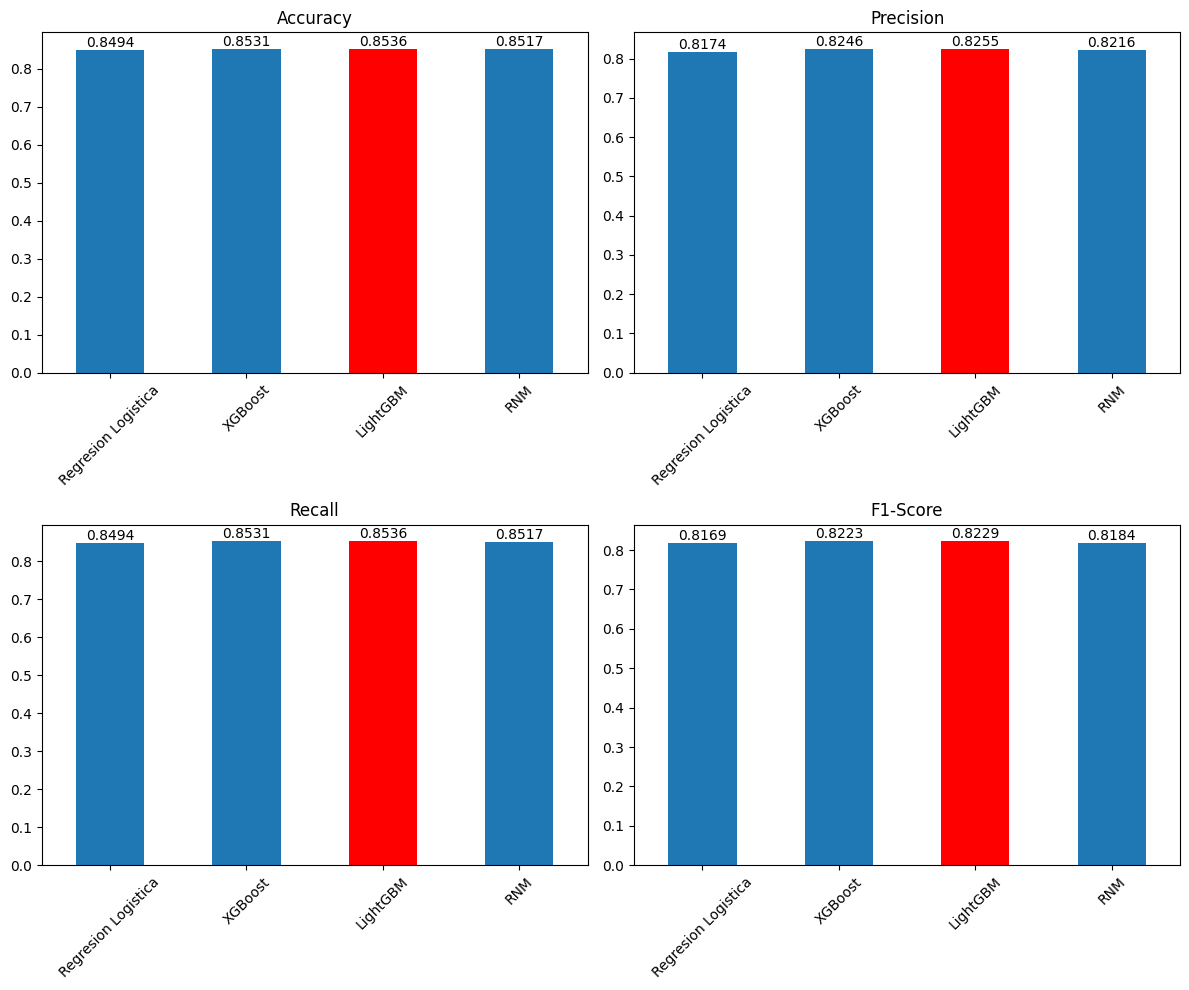

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

metrics = {'Accuracy': axes[0, 0],
           'Precision': axes[0, 1],
           'Recall': axes[1, 0],
           'F1-Score': axes[1, 1]}

for metric, ax in metrics.items():
    df_res2.plot(x='Modelo', y=metric, kind='bar', ax=ax, title=metric, legend=False)
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)

    max_value = df_res2[metric].max()

    for p in ax.patches:
        height = round(p.get_height(), 4)
        ax.annotate(str(height), (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=10)
        if height == round(max_value, 4):
            p.set_facecolor('red') # Pinta de rojo la barra del valor máximo

plt.tight_layout()
plt.show()